**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import csv
df = pd.read_csv('/content/Suicide_Detection.csv',encoding='latin1',skiprows=[59304], error_bad_lines=False)

In [ ]:
df= df[['text','class']]

In [ ]:
df.shape

(232457, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232457 entries, 0 to 232456
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232131 non-null  object
 1   class   232070 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [ ]:
df['class'].value_counts()

suicide                                                                                                                                                                                                                                                                                                                                                       116026
non-suicide                                                                                                                                                                                                                                                                                                                                                   116006
  which  is  in  thewilderness.7And they returned                                                                                                                                                                                                                                             

In [ ]:
df['text'][1]

"Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it"

In [ ]:
df_filtered = df[df['class'].isin(['suicide', 'non-suicide'])]

In [ ]:
df = df_filtered

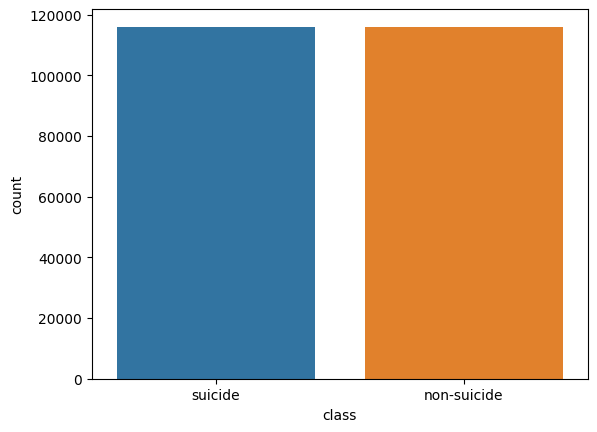

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create countplot
sns.countplot(data=df, x='class')
# Show plot
plt.show()

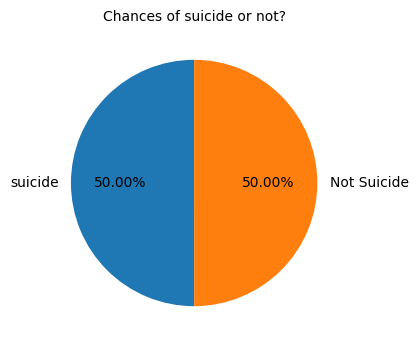

In [ ]:
plt.figure(figsize=(5,4))
plt.pie(df['class'].value_counts(),startangle=90, autopct='%0.2f%%',labels=['suicide','Not Suicide'])
plt.title('Chances of suicide or not?',fontdict={'size':10})
plt.show()

In [ ]:
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
df["text"].isnull().sum() ##checking Null values

0

In [ ]:

pd.value_counts(df['text']).head()
print(df['text'].nunique())

232028


**Cleaning The Data**

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
## Make text lowercase, remove text in square brackets,
## remove punctuation and remove words containing numbers.
def clean_text_round1(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide
...,...,...
232452,If you don't like rock then your not going to ...,non-suicide
232453,You how you can tell i have so many friends an...,non-suicide
232454,pee probably tastes like salty teaðð¦â¼ï...,non-suicide
232455,The usual stuff you find hereI'm not posting t...,suicide


In [ ]:

#Let's take a look at the updated text
data_clean = pd.DataFrame(df.text.apply(round1))
data_clean

,text
0,ex wife threatening suiciderecently i left my ...
1,am i weird i dont get affected by compliments ...
2,finally is almost over so i can never hear h...
3,i need helpjust help me im crying so hard
4,iâm so losthello my name is adam and iâve...
...,...
232452,if you dont like rock then your not going to g...
232453,you how you can tell i have so many friends an...
232454,pee probably tastes like salty teaðð¦â¼ï...
232455,the usual stuff you find hereim not posting th...


In [ ]:

##Apply a second round of cleaning,Get rid of some additional punctuation
##non-sensical text that was missed the first time around
def clean_text_round2(text):

    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
round2 = lambda x: clean_text_round2(x)



In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.text.apply(round2))
data_clean
pd.value_counts(data_clean['text']).head()
data_clean.duplicated().sum()##33944 duplicated rows in data_clean data
data=data_clean.drop_duplicates(['text'])


In [ ]:
data

,text
0,ex wife threatening suiciderecently i left my ...
1,am i weird i dont get affected by compliments ...
2,finally is almost over so i can never hear h...
3,i need helpjust help me im crying so hard
4,iâm so losthello my name is adam and iâve...
...,...
232452,if you dont like rock then your not going to g...
232453,you how you can tell i have so many friends an...
232454,pee probably tastes like salty teaðð¦â¼ï...
232455,the usual stuff you find hereim not posting th...


In [ ]:
##stop words

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
stop.append('yes')
stop_qes = data.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
stop_qes.dtype
stop_words = pd.DataFrame(stop_qes)
stop_words.text.nunique()
stop_words.duplicated().sum() ###20711
stop_text = stop_words.drop_duplicates(['text'])
stop_text.text.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments coming som...
2    finally almost never hear bad year ever swear ...
3                    need helpjust help im crying hard
4    iâm losthello name adam iâve struggling ye...
Name: text, dtype: object

In [ ]:
##Stemming part

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stem_tex = stop_text.text.apply(lambda x: ''.join([stemmer.stem(y) for y in x]))
stem_tex.dtype
ste_text = pd.DataFrame(stem_tex)
ste_text.text.nunique()
ste_text.duplicated().sum()
ste_text["text"].head()


0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments coming som...
2    finally almost never hear bad year ever swear ...
3                    need helpjust help im crying hard
4    iâm losthello name adam iâve struggling ye...
Name: text, dtype: object

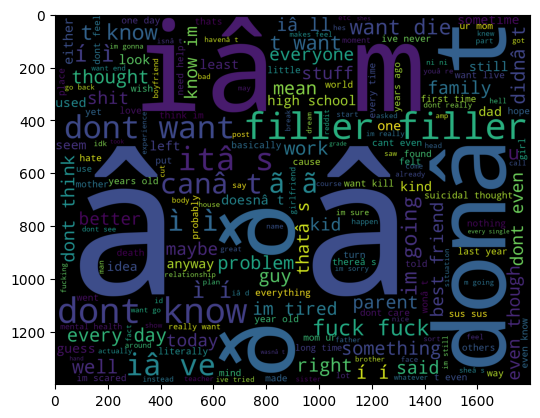

In [ ]:
#Creating word Cloud
# Joinining all the reviews into single paragraph
import matplotlib.pyplot as plt
#pip install wordcloud
from wordcloud import WordCloud
cloud = " ".join(ste_text.text)

wordcloud= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(cloud)

plt.imshow(wordcloud)
plt.show()


[Text(0, 0, 'im'),
 Text(1, 0, 'like'),
 Text(2, 0, 'dont'),
 Text(3, 0, 'want'),
 Text(4, 0, 'know'),
 Text(5, 0, 'iâ'),
 Text(6, 0, 'feel'),
 Text(7, 0, 'life'),
 Text(8, 0, 'get'),
 Text(9, 0, 'people'),
 Text(10, 0, 'even'),
 Text(11, 0, 'one'),
 Text(12, 0, 'time'),
 Text(13, 0, 'would'),
 Text(14, 0, 'really'),
 Text(15, 0, 'ive'),
 Text(16, 0, 'cant'),
 Text(17, 0, 'think'),
 Text(18, 0, 'going'),
 Text(19, 0, 'go'),
 Text(20, 0, 'never'),
 Text(21, 0, 'friends'),
 Text(22, 0, 'much'),
 Text(23, 0, 'day'),
 Text(24, 0, 'help')]

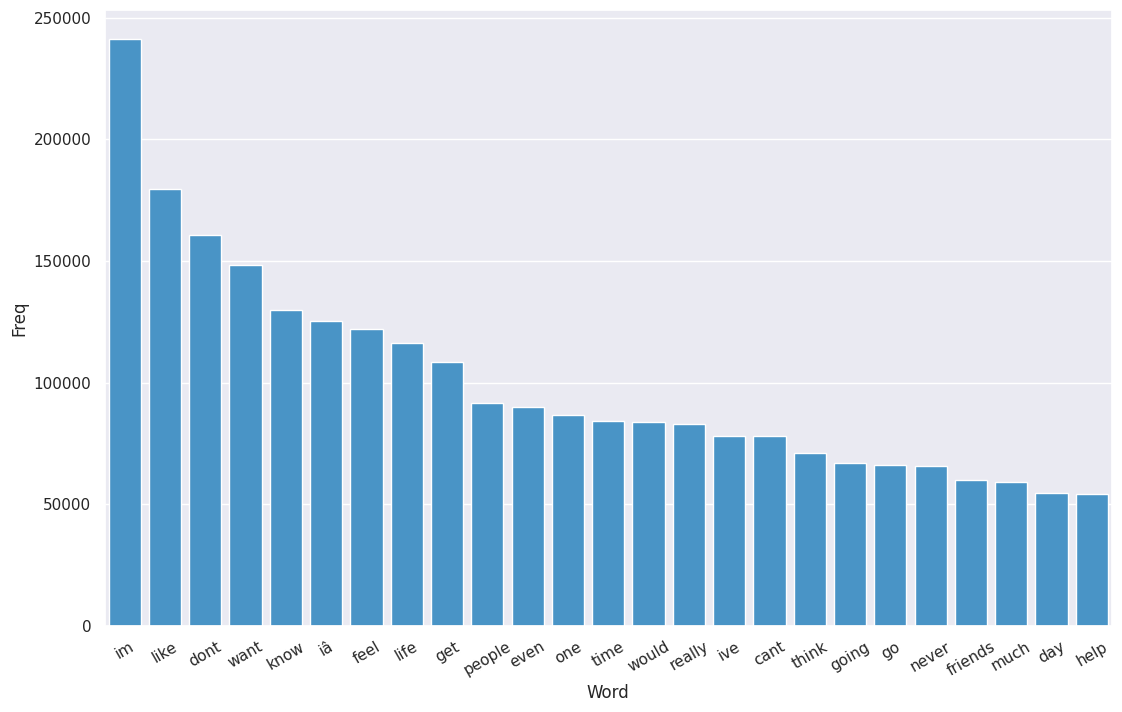

In [ ]:
##N-Gram
corpus=ste_text["text"]
#pip install -U scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=25)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#top_df.head(25)

#Barplot of most freq words
#pip install seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
color = "#3498db"
g = sns.barplot(x="Word", y="Freq", data=top_df,color=color)
g.set_xticklabels(g.get_xticklabels(), rotation=30)


[Text(0, 0, 'feel like'),
 Text(1, 0, 'filler filler'),
 Text(2, 0, 'dont know'),
 Text(3, 0, 'dont want'),
 Text(4, 0, 'iâ ve'),
 Text(5, 0, 'fuck fuck'),
 Text(6, 0, 'want die'),
 Text(7, 0, 'im going'),
 Text(8, 0, 'donâ know'),
 Text(9, 0, 'donâ want'),
 Text(10, 0, 'like im'),
 Text(11, 0, 'every day'),
 Text(12, 0, 'iâ ll'),
 Text(13, 0, 'dont think'),
 Text(14, 0, 'im tired'),
 Text(15, 0, 'dont even'),
 Text(16, 0, 'get better'),
 Text(17, 0, 'know im'),
 Text(18, 0, 'even though'),
 Text(19, 0, 'high school')]

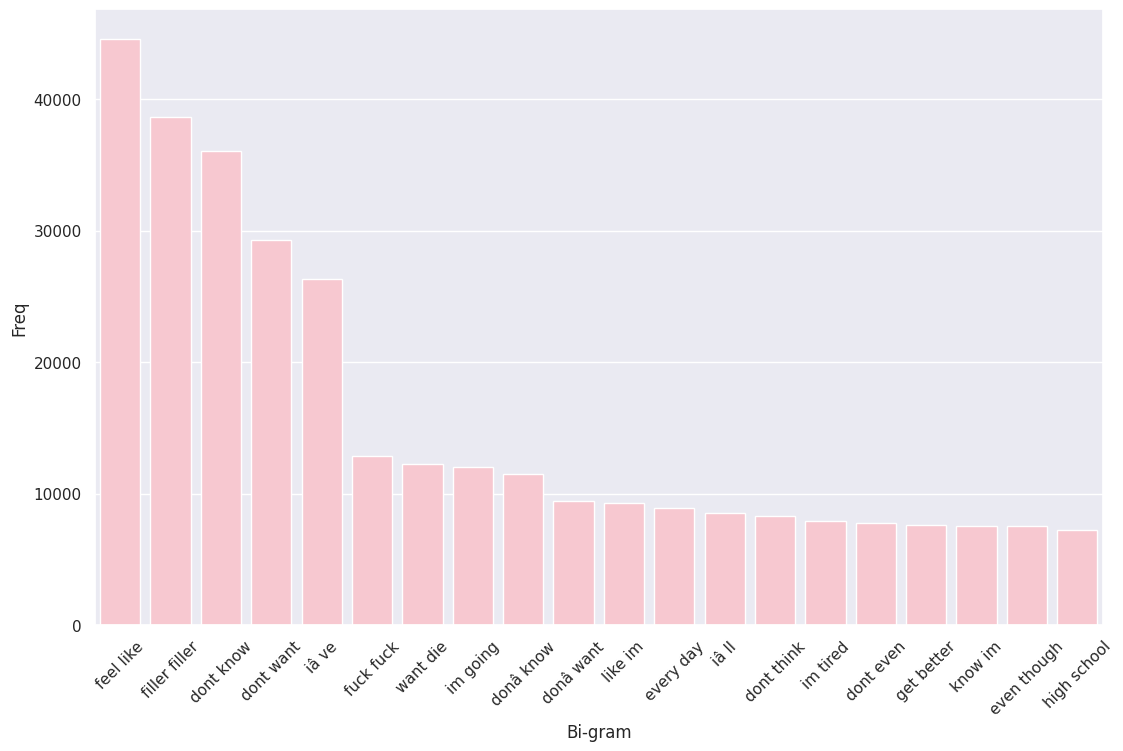

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):

    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)
#Barplot of most freq Bi-grams

import seaborn as sns
color = "#FFC0CB"
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df,color = color)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [ ]:
from textblob import TextBlob
X = df['text']  # Features: text data
# Define a function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the text data
df['sentiment_polarity'] = X.apply(get_sentiment_polarity)
# Print the resulting dataframe with sentiment polarity values
print(df.head())

                                                text        class  \
0  Ex Wife Threatening SuicideRecently I left my ...      suicide   
1  Am I weird I don't get affected by compliments...  non-suicide   
2  Finally 2020 is almost over... So I can never ...  non-suicide   
3          i need helpjust help me im crying so hard      suicide   
4  Iâm so lostHello, my name is Adam (16) and I...      suicide   

   sentiment_polarity  
0            0.071429  
1            0.100000  
2           -0.525000  
3           -0.245833  
4           -0.128410  


In [ ]:
import nltk
nltk.download('punkt')
# Perform POS tagging on each text in the dataset
df['pos_tags'] = df['text'].apply(lambda x: TextBlob(x).tags)

# Print the POS tagging results
print(df[['text', 'pos_tags']])

In [ ]:
##Named Entity Recognition with NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
##Now we apply word tokenization and part-of-speech tagging to the sentence
corpus1=pd.DataFrame(stop_text)
corpus1.text.dtype
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

##O/p we get a list of tuples containing the individual words in the
##sentence and their associated part-of-speech
import nltk
nltk.download('averaged_perceptron_tagger')
co = ' '.join(corpus1["text"])
sent = preprocess(co)
print(sent)

In [ ]:
##Now we implement noun phrase chunking to identify named entities using
##a regular expression consisting of rules that indicate how sentences should be chunked
pattern = 'NP: {<DT>?<JJ>*<NN>}'
#pattern = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
#help(re)
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)
cs.draw()
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

In [ ]:
##With the function nltk.ne_chunk(),
##we can recognize named entities using a classifier
from nltk.tag import pos_tag
nltk.download('maxent_ne_chunker')
nltk.download('words')
corpus1=pd.DataFrame(stop_text)
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(str(corpus1))))
print(ne_tree)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  text/NN
  0/CD
  ex/JJ
  wife/NN
  threatening/VBG
  suiciderecently/RB
  left/VBN
  wife/NN
  .../:
  1/CD
  weird/JJ
  dont/NN
  get/NN
  affected/JJ
  compliments/NNS
  coming/VBG
  som/NN
  .../:
  2/CD
  finally/RB
  almost/RB
  never/RB
  hear/VBP
  bad/JJ
  year/NN
  ever/RB
  swear/VBP
  .../:
  3/CD
  need/NN
  helpjust/NN
  help/VB
  im/VB
  crying/VBG
  hard/JJ
  4/CD
  iâm/NN
  losthello/NN
  name/NN
  adam/JJ
  iâve/NN
  struggling/VBG
  ye/NN
  .../:
  .../:
  .../:
  232452/CD
  dont/NN
  like/IN
  rock/NN
  going/VBG
  get/VB
  anything/NN
  go/VB
  232453/CD
  tell/RB
  many/JJ
  friends/NNS
  lonely/RB
  everything/NN
  deprived/VBD
  p/NNS
  .../:
  232454/CD
  pee/NN
  probably/RB
  tastes/VBZ
  like/IN
  salty/NN
  teaðð¦â¼ï/NN
  .../:
  232455/CD
  usual/JJ
  stuff/NN
  find/VBP
  hereim/JJ
  posting/VBG
  sympathy/JJ
  pity/NN
  .../:
  232456/CD
  still/RB
  havent/JJ
  beaten/NNS
  first/JJ
  boss/IN
  hollow/JJ
  knight/NN
  i/NN
  .../:
  [/$
 

In [ ]:
##Here we are doing TF-IDF by using using Stemming data
##check the weight of the data
#The tf-idf weight is a weight often used in information retrieval
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
tvec_ta = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
tvec_weights_ta = tvec_ta.fit_transform(ste_text.text.dropna())
weights_ta = np.asarray(tvec_weights_ta.mean(axis=0)).ravel().tolist()
weights_df_ta = pd.DataFrame({'term': tvec_ta.get_feature_names_out(), 'weight': weights_ta})
weights_df_ta=weights_df_ta.sort_values(by='weight', ascending=False)
weights_df_ta.head(10)



In [ ]:
# Perform POS tagging using NLTK
df['pos_tags'] = df['text'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
# Print the DataFrame with POS tags
print(df[['text', 'pos_tags']])

In [ ]:
df.shape


(232032, 3)

In [ ]:
data.shape

(231664, 1)

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
import spacy
!python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

class TextPreprocessor(TransformerMixin):
    def __init__(self, text_attribute):
        self.text_attribute = text_attribute

    def transform(self, X, *_):
        X_copy = X.copy()
        X_copy[self.text_attribute] = X_copy[self.text_attribute].apply(self._preprocess_text)
        return X_copy

    def _preprocess_text(self, text):
        return self._lemmatize(self._leave_letters_only(self._clean(text)))

    def _clean(self, text):
        bad_symbols = '!"#%&\'*+,-<=>?[\\]^_`{|}~'
        text_without_symbols = text.translate(str.maketrans('', '', bad_symbols))

        text_without_bad_words = ''
        for line in text_without_symbols.split('\n'):
            if not line.lower().startswith('from:') and not line.lower().endswith('writes:'):
                text_without_bad_words += line + '\n'

        clean_text = text_without_bad_words
        email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
        regexes_to_remove = [email_regex, r'Subject:', r'Re:']
        for r in regexes_to_remove:
            clean_text = re.sub(r, '', clean_text)

        return clean_text

    def _leave_letters_only(self, text):
        text_without_punctuation = text.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(re.findall("[a-zA-Z]+", text_without_punctuation))

    def _lemmatize(self, text):
        doc = nlp(text)
        words = [x.lemma_ for x in [y for y in doc if not y.is_stop and y.pos_ != 'PUNCT'
                                    and y.pos_ != 'PART' and y.pos_ != 'X']]
        return ' '.join(words)

    def fit(self, *_):
        return self

2023-04-28 17:42:23.234301: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
from tqdm import tqdm
!pip install neattext
import neattext.functions as nfx

def clean_text(text):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
#         sent=nfx.remove_shortwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['class']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


**Applying SVM Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train an SVM model
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='suicide')
recall = recall_score(y_test, y_pred, pos_label='suicide')
f1 = f1_score(y_test, y_pred, pos_label='suicide')

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

**Applying Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='suicide')
recall = recall_score(y_test, y_pred, pos_label='suicide')
f1 = f1_score(y_test, y_pred, pos_label='suicide')

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

**Applying Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='suicide')  # Update pos_label to 'suicide'
recall = recall_score(y_test, y_pred, pos_label='suicide')
f1 = f1_score(y_test, y_pred, pos_label='suicide')
# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9310017885232831
Precision: 0.9479115479115479
Recall: 0.91244893571275
F1-score: 0.9298422436459245


**In this project, we aimed to develop machine learning models to detect suicide ideation using NLP analysis. We used a dataset of texts labeled as "suicide" or "non-suicide" to train and test three different models: logistic regression, support vector machine (SVM), and naive Bayes. Overall, our findings suggest that machine learning models can be a useful tool for detecting suicide ideation in text data.Therefore, further research is needed to validate and improve these models and to ensure their ethical and responsible use in suicide prevention efforts.**